Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


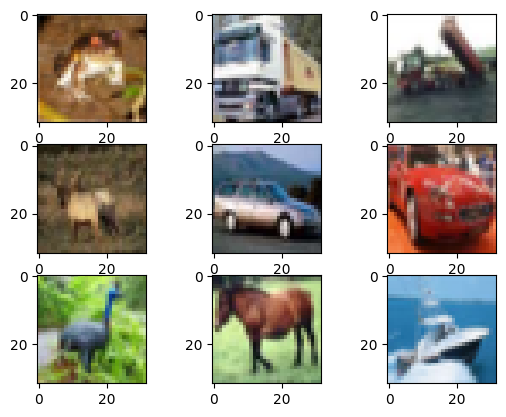

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_24 (Conv2D)              │ (None, 32, 32, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_25 (Conv2D)              │ (None, 32, 32, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 16, 16, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_26 (Conv2D)              │ (None, 16, 16, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_27 (Conv2D)              │ (None, 16, 16, 64)     │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_13 (MaxPooling2D) │ (None, 8, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_28 (Conv2D)              │ (None, 8, 8, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_29 (Conv2D)              │ (None, 8, 8, 128)      │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_14 (MaxPooling2D) │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 550,570 (2.10 MB)

 Trainable params: 550,570 (2.10 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
# example of loading the cifar10 dataset
import sys
from matplotlib import pyplot
from keras.api.datasets import cifar10
from keras.api.utils import to_categorical
from keras.api.models import Sequential
from keras.api.layers import Conv2D
from keras.api.layers import MaxPooling2D
from keras.api.layers import Dense
from keras.api.layers import Flatten
from keras.api.layers import Input
from keras.api.optimizers import SGD,Adam,RMSprop

# scale pixels
def prep_pixels(train, test):
	# convert from integers to floats
	train_norm = train.astype('float32')
	test_norm = test.astype('float32')
	# normalize to range 0-1
	train_norm = train_norm / 255.0
	test_norm = test_norm / 255.0
	# return normalized images
	return train_norm, test_norm

def summarize_diagnostics(history):
	# plot loss
	pyplot.subplot(211)
	pyplot.title('Cross Entropy Loss')
	pyplot.plot(history.history['loss'], color='blue', label='train')
	pyplot.plot(history.history['val_loss'], color='orange', label='test')
	# plot accuracy
	pyplot.subplot(212)
	pyplot.title('Classification Accuracy')
	pyplot.plot(history.history['accuracy'], color='blue', label='train')
	pyplot.plot(history.history['val_accuracy'], color='orange', label='test')
#     # save plot to file
# 	filename = sys.argv[0].split('/')[-1]
# 	pyplot.savefig(filename + '_plot.png')
# 	pyplot.close()


# load dataset
(trainX, trainY), (testX, testY) = cifar10.load_data()
# summarize loaded dataset
#each image is 32x32x3 (rgb)
print('Train: X=%s, y=%s' % (trainX.shape, trainY.shape))
#50K images training
print('Test: X=%s, y=%s' % (testX.shape, testY.shape))
#10K images test

#plot first few images
for i in range(9):
	# define subplot
	pyplot.subplot(330 + 1 + i)
	# plot raw pixel data
	pyplot.imshow(trainX[i])

# show the figure
pyplot.show()

# one hot encode target values
trainY = to_categorical(trainY)
testY = to_categorical(testY)

# prepare pixel data
trainX, testX = prep_pixels(trainX, testX)

#define the model
# example of a 3-block vgg style architecture
model = Sequential()
model.add(Input(shape=(32, 32, 3)))
# the feature extraction layers
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
# num. param 896
#we have 32 filters wich are 3x3x3 (input depth is 3 and the filter is 3x3)
#before applying the ReLu each filter adds the bias so we have 3x3x3+1=28 params
#we have 32 filters then 28x32=896
model.add(Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'))
model.add(MaxPooling2D((2, 2)))
#now the classifier layers
model.add(Flatten())
model.add(Dense(128, activation='relu', kernel_initializer='he_uniform'))
model.add(Dense(10, activation='softmax'))

# print summary
model.summary()

# compile model
#choose an optimizer

opt1 = SGD(learning_rate=0.01, momentum=0.9)
opt2=Adam()
opt3=RMSprop(learning_rate=0.0009)
model.compile(optimizer=opt1, loss='categorical_crossentropy', metrics=['accuracy'])

Epoch 1/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.6816 - loss: 0.8976 - val_accuracy: 0.7025 - val_loss: 0.8543
Epoch 2/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7490 - loss: 0.7154 - val_accuracy: 0.7196 - val_loss: 0.8193
Epoch 3/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.7846 - loss: 0.6141 - val_accuracy: 0.7270 - val_loss: 0.8080
Epoch 4/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8161 - loss: 0.5266 - val_accuracy: 0.7373 - val_loss: 0.8084
Epoch 5/5
782/782 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.8463 - loss: 0.4421 - val_accuracy: 0.7450 - val_loss: 0.7984
> 74.500


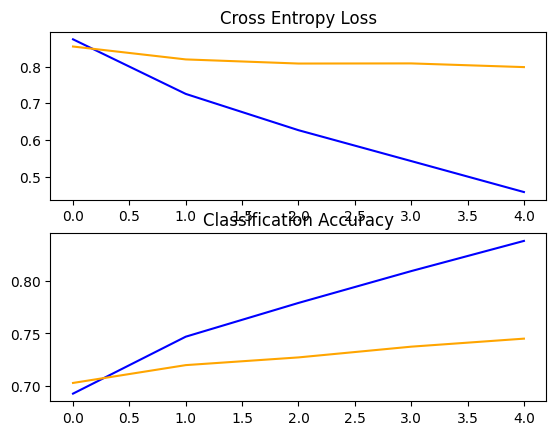

In [8]:

# fit model
history = model.fit(trainX, trainY, epochs=5, batch_size=64, validation_data=(testX, testY), verbose=1)
# evaluate model
_, acc = model.evaluate(testX, testY, verbose=0)
print('> %.3f' % (acc * 100.0))

# learning curves
summarize_diagnostics(history)